In [0]:
### INITIAL FLAIR TRAINING - MORTGAGE RATES
### Authors: JONATHAN CHAN 

###MOST RECENT UPDATE:  
##2020 MAY 20, 9:19PM
#got code working Google Colab
#initial 2 phase training experiment completed

#TO DO:
#convert labels of kaggle dataset to 1, -1, 0 instead of 'positive', 'negative', 'neutral'

In [1]:
!pip install flair

In [0]:
from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus
from flair.data import Corpus
from flair.datasets import TREC_6
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from flair.data import Sentence
from flair.visual.training_curves import Plotter

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#use this install and restart runtime for this error: 
#ValueError: invalid literal for int() with base 10: '0+cpu' 

#pip install --upgrade git+https://github.com/flairNLP/flair.git

# Training Phase 1 - Kaggle dataset
#### train.csv = 3500 rows
#### dev.csv = 500 rows
#### test.csv = 346 rows

In [22]:
# this is the folder in which train, test and dev files reside
#FOR CPU: 
#data_folder = 'experimental_flair_data/kaggle_data/'
#FOR COLAB: 
data_folder = "./drive/My Drive/Colab Notebooks/capstone/data/kaggle_data_divided"

# column format indicating which columns hold the text and label(s)
#column 0 = label (positive, negative, neutral)
#column 1 = headline
column_name_map = {1: "text", 0: "label_topic"}

# 1. load corpus containing training, test and dev data and if CSV has a header, you can skip it
corpus: Corpus = CSVClassificationCorpus(data_folder,
                                         column_name_map,
                                         skip_header=False, #no header in kaggle data
                                         delimiter=',',    # comma separated rows
) 
    



2020-05-21 04:38:13,395 Reading data from drive/My Drive/Colab Notebooks/capstone/data/kaggle_data_divided
2020-05-21 04:38:13,397 Train: drive/My Drive/Colab Notebooks/capstone/data/kaggle_data_divided/train.csv
2020-05-21 04:38:13,398 Dev: drive/My Drive/Colab Notebooks/capstone/data/kaggle_data_divided/dev.csv
2020-05-21 04:38:13,398 Test: drive/My Drive/Colab Notebooks/capstone/data/kaggle_data_divided/test.csv


In [23]:


# 2. create the label dictionary
label_dict = corpus.make_label_dictionary()

# 3. make a list of word embeddings
word_embeddings = [WordEmbeddings('glove'),

                   # comment in flair embeddings for state-of-the-art results
                   # FlairEmbeddings('news-forward'),
                   # FlairEmbeddings('news-backward'),
                   ]

# 4. initialize document embedding by passing list of word embeddings
# Can choose between many RNN types (GRU by default, to change use rnn_type parameter)
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                     hidden_size=512,
                                                                     reproject_words=True,
                                                                     reproject_words_dimension=256,
                                                                     )


2020-05-21 04:38:15,732 Computing label dictionary. Progress:


100%|██████████| 3845/3845 [00:02<00:00, 1388.47it/s]

2020-05-21 04:38:19,018 [b'\xef\xbb\xbfneutral', b'neutral', b'negative', b'positive', b'\xef\xbb\xbfpositive']



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [24]:

# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

# 7. start the training
trainer.train('resources/taggers/ag_news',
              learning_rate=0.1,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=5,
              max_epochs=10)

2020-05-21 04:38:25,825 ----------------------------------------------------------------------------------------------------
2020-05-21 04:38:25,826 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
    )
    (word_reprojection_map): Linear(in_features=100, out_features=256, bias=True)
    (rnn): GRU(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=5, bias=True)
  (loss_function): CrossEntropyLoss()
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2020-05-21 04:38:25,827 ----------------------------------------------------------------------------------------------------
2020-05-21 04:38:25,830 Corpus: "Corpus: 3499 train + 500 dev + 346 test sentences"
2020-05-21 04:38:25,832 ----------------------------------------------------------------------------------------------------
2020-05-21 04:38:2

{'dev_loss_history': [0.6545652151107788,
  0.5220544338226318,
  1.037886142730713,
  0.7913463711738586,
  0.48536163568496704,
  0.6475303173065186,
  0.527144193649292,
  1.0025655031204224,
  0.7598215937614441,
  0.7167680859565735],
 'dev_score_history': [0.9488,
  0.9688,
  0.704,
  0.88,
  0.9536,
  0.9104,
  0.948,
  0.8048,
  0.8904,
  0.9],
 'test_score': 0.6786127167630058,
 'train_loss_history': [0.8597476384856484,
  0.7781950175762177,
  0.7650230337272991,
  0.7388146034695885,
  0.7287988527254625,
  0.726521615006707,
  0.6962256813591177,
  0.6942331213842738,
  0.671444151618264,
  0.6706191818822514]}

Weights plots are saved in resources/taggers/ag_news/weights.png
2020-05-21 04:40:14,142 loading file resources/taggers/ag_news/final-model.pt


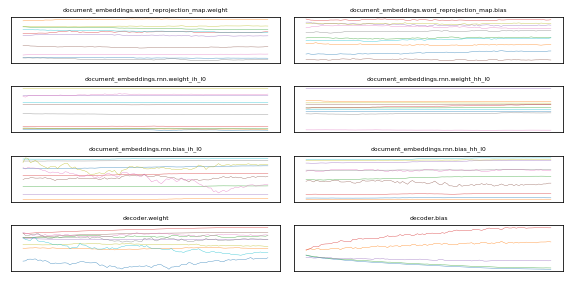

In [25]:
plotter = Plotter()
plotter.plot_weights('resources/taggers/ag_news/weights.txt')

classifier = TextClassifier.load('resources/taggers/ag_news/final-model.pt')


In [26]:
# create example sentence
sentence = Sentence("Canada's growth weakens as investment drops, consumers fade")

# predict class and print
classifier.predict(sentence)

print(sentence.labels)

[positive (0.6370)]


# TRAINING PHASE II - Mortgage subset
#### train.csv = 80 rows
#### dev.csv = 25 rows
#### test.csv = 25 rows

In [27]:
# this is the folder in which train, test and dev files reside
#FOR CPU: 
#data_folder = 'experimental_flair_data/annotated_subset/'
#FOR COLAB: 
data_folder = "./drive/My Drive/Colab Notebooks/capstone/data/annotated_data_divided_mortgage_rate"

# column format indicating which columns hold the text and label(s)
#column 2 = headline and description concatenation
#column 4 = label (-1, 0, 1)

column_name_map = {2: "text", 4: "label_topic"}

# load corpus containing training, test and dev data and if CSV has a header, you can skip it
# 1. get the corpus
corpus: Corpus = CSVClassificationCorpus(data_folder,
                                         column_name_map,
                                         skip_header=True,
                                         delimiter=',',    # tab-separated files
) 
    




2020-05-21 04:40:32,043 Reading data from drive/My Drive/Colab Notebooks/capstone/data/annotated_data_divided_mortgage_rate
2020-05-21 04:40:32,045 Train: drive/My Drive/Colab Notebooks/capstone/data/annotated_data_divided_mortgage_rate/train.csv
2020-05-21 04:40:32,046 Dev: drive/My Drive/Colab Notebooks/capstone/data/annotated_data_divided_mortgage_rate/dev.csv
2020-05-21 04:40:32,047 Test: drive/My Drive/Colab Notebooks/capstone/data/annotated_data_divided_mortgage_rate/test.csv


In [28]:

#REPEAT TRAINING PROCESS, but use same document_embeddings as in phase 1

# 2. create the label dictionary
# label_dict = corpus.make_label_dictionary()

# # 3. make a list of word embeddings
# word_embeddings = [WordEmbeddings('glove'),

#                    # comment in flair embeddings for state-of-the-art results
#                    # FlairEmbeddings('news-forward'),
#                    # FlairEmbeddings('news-backward'),
#                    ]

# # 4. initialize document embedding by passing list of word embeddings
# # Can choose between many RNN types (GRU by default, to change use rnn_type parameter)
# document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
#                                                                      hidden_size=512,
#                                                                      reproject_words=True,
#                                                                      )

# # 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

# 7. start the training
trainer.train('resources/taggers/ag_news',
              learning_rate=0.01,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=5,
              max_epochs=50)

2020-05-21 04:40:33,502 ----------------------------------------------------------------------------------------------------
2020-05-21 04:40:33,504 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
    )
    (word_reprojection_map): Linear(in_features=100, out_features=256, bias=True)
    (rnn): GRU(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=5, bias=True)
  (loss_function): CrossEntropyLoss()
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2020-05-21 04:40:33,505 ----------------------------------------------------------------------------------------------------
2020-05-21 04:40:33,506 Corpus: "Corpus: 81 train + 24 dev + 20 test sentences"
2020-05-21 04:40:33,507 ----------------------------------------------------------------------------------------------------
2020-05-21 04:40:33,51

{'dev_loss_history': [1.0877492427825928,
  0.36803317070007324,
  0.12912802398204803,
  0.061329375952482224,
  0.039375513792037964,
  0.028452575206756592,
  0.021824747323989868,
  0.01721861958503723,
  0.014344562776386738,
  0.011879523284733295,
  0.010552625171840191,
  0.009286493062973022,
  0.008305509574711323,
  0.007453501224517822,
  0.006810873746871948,
  0.00612911581993103,
  0.005440304521471262,
  0.005014469381421804,
  0.004715442657470703,
  0.004435698036104441,
  0.00414876127615571,
  0.003927846904844046,
  0.0037132103461772203,
  0.0035389463882893324,
  0.0034026503562927246,
  0.003263533115386963,
  0.0031174421310424805,
  0.0029659669380635023,
  0.0028323729056864977,
  0.0027249057311564684,
  0.002610226394608617,
  0.0025129318237304688,
  0.0024273593444377184,
  0.0023422043304890394,
  0.0022342801094055176,
  0.0021686553955078125,
  0.002094646217301488,
  0.002025862457230687,
  0.0019568800926208496,
  0.0018668571719899774,
  0.001810451

Weights plots are saved in resources/taggers/ag_news/weights.png
2020-05-21 04:45:24,784 loading file resources/taggers/ag_news/final-model.pt
[﻿neutral (0.9881)]


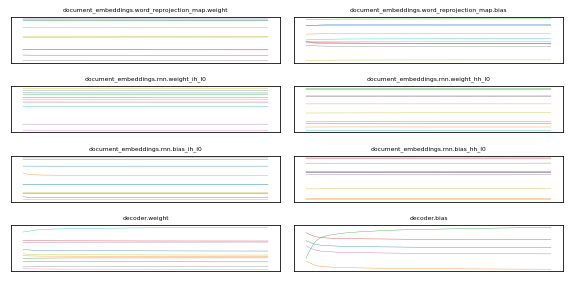

In [29]:
# 8. plot weight traces (optional)
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_weights('resources/taggers/ag_news/weights.txt')

classifier = TextClassifier.load('resources/taggers/ag_news/final-model.pt')

# create example sentence
sentence = Sentence("Canada's growth weakens as investment drops, consumers fade")

# predict class and print
classifier.predict(sentence)

print(sentence.labels)

In [30]:
classifier = TextClassifier.load('resources/taggers/ag_news/final-model.pt')

# create example sentence
sentence = Sentence("Canada's growth weakens as investment drops, consumers fade")

# predict class and print
classifier.predict(sentence)

print(sentence.labels)

2020-05-21 04:45:30,051 loading file resources/taggers/ag_news/final-model.pt
[﻿neutral (0.9881)]
